In [3]:
import geopandas as gpd

fp = 'cb_2018_us_state_500k.shp'
map_df = gpd.read_file(fp)

In [10]:
map_df.columns

Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')

In [11]:
map_df

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169..."
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ..."
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ..."
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ..."
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3..."
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ..."


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [13]:
df = pd.read_csv('MentalHealthIndicators.csv')

In [14]:
df_state = df[df['Indicator'] == 'Symptoms of Depressive Disorder'].reset_index(drop = True)
df_state = df_state[df_state['Group'] == 'By State']

pivot_state = pd.pivot_table(df_state, values='Value', index=['Subgroup'],
                    columns=['Week'], aggfunc=np.sum)

pivot_state = pd.DataFrame(pivot_state.to_records())
pivot_state['Average'] = pivot_state.mean(numeric_only=True, axis=1)
pivot_state

,Subgroup,1,2,3,4,5,6,7,8,9,10,11,12,Average
0,Alabama,18.6,22.5,19.6,20.9,28.4,27.7,26.7,27.5,26.5,28.6,30.4,32.7,25.841667
1,Alaska,19.2,25.1,23.6,26.8,24.4,21.5,23.5,25.7,23.8,21.5,27.4,27.4,24.158333
2,Arizona,22.4,25.3,20.0,25.1,23.9,26.5,25.0,28.9,32.7,31.3,33.9,34.3,27.441667
3,Arkansas,26.6,24.5,28.9,23.8,28.9,26.5,29.6,28.7,29.6,30.2,34.8,33.7,28.816667
4,California,25.4,22.8,28.7,26.9,26.9,28.6,27.2,26.4,27.6,27.6,31.8,31.2,27.591667
5,Colorado,22.0,23.6,23.7,25.5,23.9,23.9,22.1,23.0,26.1,30.0,26.1,29.1,24.916667
6,Connecticut,24.4,21.5,20.2,21.0,25.4,20.7,25.5,28.7,24.0,26.3,26.7,25.9,24.191667
7,Delaware,21.1,23.3,21.8,22.7,20.7,25.3,24.4,22.9,25.4,22.7,23.3,26.5,23.341667
8,District of Columbia,26.4,30.3,25.9,20.9,21.3,25.9,16.3,31.0,27.6,24.9,20.8,23.8,24.591667
9,Florida,22.5,24.8,24.3,28.6,29.6,30.2,28.1,28.8,31.8,27.9,31.7,30.7,28.250000


In [21]:
pmin = pivot_state['Average'].min()
pmax = pivot_state['Average'].max()
pavg = pivot_state['Average'].mean()

def f(row):
    if row['Average'] <= pavg - 2:
        val = 'Low'
    elif (row['Average'] <= pavg + 2) and (row['Average'] >= pavg - 2):
        val = 'Medium'
    else:
        val = 'High'
    return val

pivot_state['Level_of_Effect'] = pivot_state.apply(f, axis=1)
pivot_state_i = pivot_state[['Subgroup','Average','Level_of_Effect']]
pivot_state_i.columns = ['NAME','Average','Level_of_Effect']
pivot_state_i

,NAME,Average,Level_of_Effect
0,Alabama,25.841667,Medium
1,Alaska,24.158333,Medium
2,Arizona,27.441667,High
3,Arkansas,28.816667,High
4,California,27.591667,High
5,Colorado,24.916667,Medium
6,Connecticut,24.191667,Medium
7,Delaware,23.341667,Medium
8,District of Columbia,24.591667,Medium
9,Florida,28.250000,High


In [22]:
data_df = pd.merge(map_df, pivot_state_i, how='left', on='NAME')

In [38]:
data_df = data_df[data_df['Average'].notna()]
data_df = data_df[data_df['NAME'] != 'Alaska']
data_df

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,Average,Level_of_Effect
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...",31.150000,High
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",23.683333,Medium
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00257 36.52659, -103.00219 36.6...",27.783333,High
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",24.466667,Medium
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.64320 38.16909, -82.64300 38.169...",27.341667,High
5,22,01629543,0400000US22,22,LA,Louisiana,00,111897594374,23753621895,"MULTIPOLYGON (((-88.86770 29.86155, -88.86566 ...",30.791667,High
6,26,01779789,0400000US26,26,MI,Michigan,00,146600952990,103885855702,"MULTIPOLYGON (((-83.19159 42.03537, -83.18993 ...",24.441667,Medium
7,25,00606926,0400000US25,25,MA,Massachusetts,00,20205125364,7129925486,"MULTIPOLYGON (((-70.23405 41.28565, -70.22361 ...",21.941667,Low
8,16,01779783,0400000US16,16,ID,Idaho,00,214049787659,2391722557,"POLYGON ((-117.24267 44.39655, -117.23484 44.3...",22.641667,Low
9,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",28.250000,High


In [67]:
keys = list(data_df['Level_of_Effect'].unique())
color_range = list(np.linspace(0, 1, len(keys), endpoint=False))
colors = ["#08306b","#57a0ce","#d2e3f3"]
color_dict = dict(zip(keys, colors))
color_dict['No data'] = 'lightgray'

In [68]:
keys

['High', 'Medium', 'Low']

In [69]:
row_count = data_df['Level_of_Effect'].nunique()
ax_list = []
for i in range(row_count+1):
    ax_list.append('ax' + str(i+1))
    ax_string = ', '.join(ax_list)

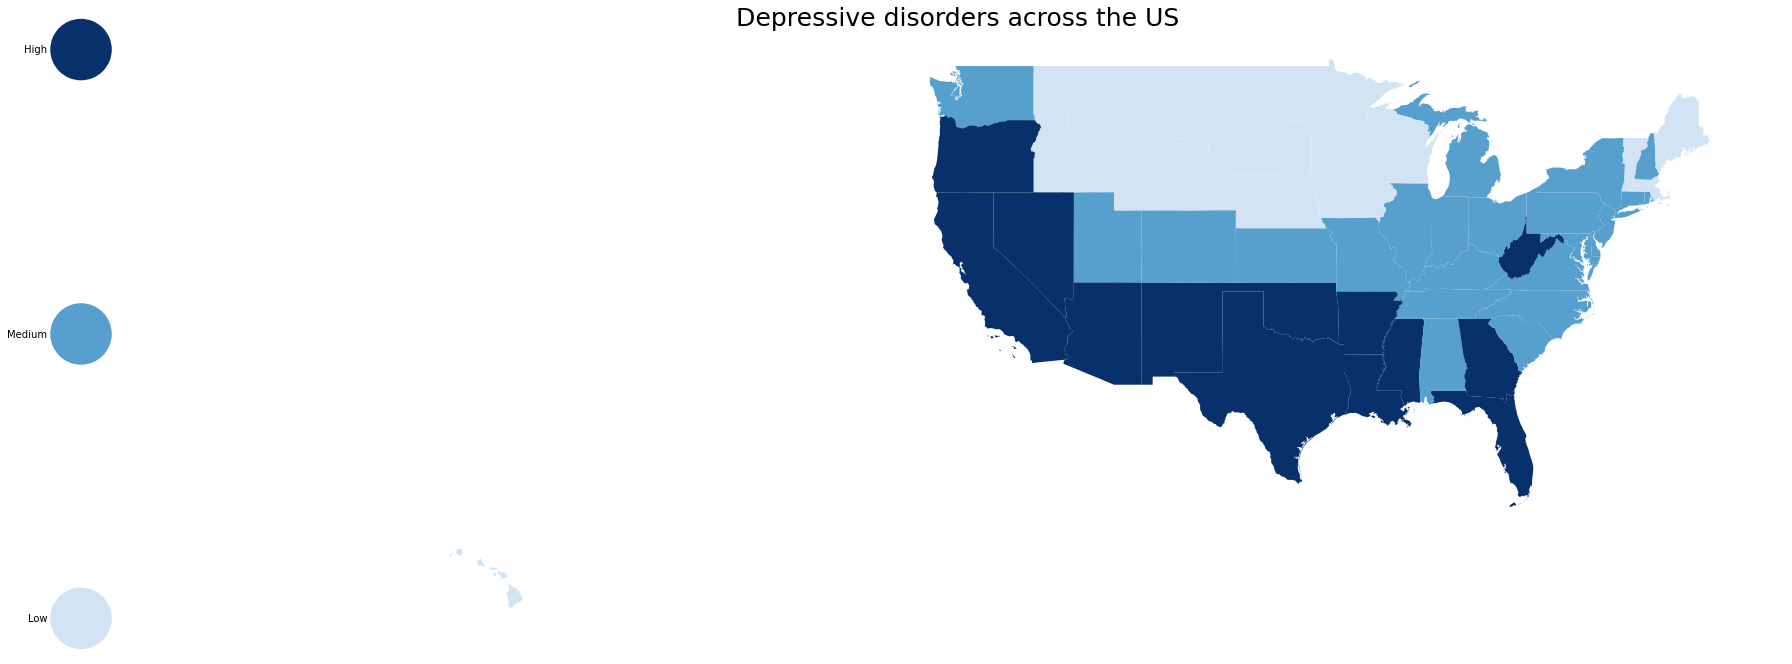

In [106]:


fig, (ax_string) = plt.subplots(row_count, 20)
    
row_counter = 0
for i in data_df['Level_of_Effect'].unique():
    plt.subplot2grid((row_count,20),(row_counter,0))
    plt.pie([1],labels=[i],radius=1, colors=[color_dict[i]])
    plt.axis('off')
    row_counter += 1
    

# CREATE PLOT
ax1 = plt.subplot2grid((row_count,20),(0,1), rowspan=row_count, colspan=19)
for index, row in data_df.iterrows():
    plot = data_df[data_df['GEOID'] == row['GEOID']].plot(color=color_dict[row['Level_of_Effect']], ax=ax1)
    ax1.axis('off')
    ax1.set_title('Depressive disorders across the US', size=25)   
    
plt.subplots_adjust(wspace=0, hspace=0)
fig.set_size_inches(25, 12, forward=True)
plt.tight_layout()    
